# TIBURONES EN LA COSTA OESTE DE EEUU
Se plantea investigar si es cierto que el número de ataques de tiburones a surfistas se ha producido en la costa oeste
de los EEUU  

In [6]:
import pandas as pd
import numpy as np
import re
import sys
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Tiburones1.csv', sep = ',', engine = 'python')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
df.shape

(5992, 24)

In [5]:
df.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [6]:
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
df1 =df[(df.Country =='USA') &(df.Activity=='Surfing') ]
df1

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
13,2016.08.29.b,29-Aug-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Sam Cumiskey,M,...,"Bull shark, 6'","News Channel 8, 8/30/16",2016.08.29.b-Cumiskey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.29.b,2016.08.29.b,5980,NaN,NaN
14,2016.08.29.a,29-Aug-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"News Channel 8, 8/30/16",2016.08.29.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.29.a,2016.08.29.a,5979,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,1965.00.00.f,1965,1965,Provoked,USA,California,"Dana Point, San Clemente, Orange County",Surfing,Barry Berg,M,...,NaN,"Orange County Register, 1/28/2998",1965.00.00.f-Berg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.00.00.f,1965.00.00.f,2576,NaN,NaN
4058,1955.08.30.a,30-Aug-55,1955,Provoked,USA,California,"Zuma Beach, Santa Monica, Los Angeles County",Surfing,Dale Strand,M,...,5' thresher or blue shark. The shark was kill...,"SAF Case #244; D. Miller & R. Collier, V.M. Co...",1955.08.30.a-DaleStrand.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.08.30.a,1955.08.30.a,1935,NaN,NaN
5808,1828.00.00,1828,1828,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,...,NaN,"J. Borg, p.68; L. Taylor (1993), pp.94-95",1828.00.00-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1828.00.00,1828.00.00,185,NaN,NaN
5837,1779.00.00,1779,1779,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,...,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,156,NaN,NaN


In [8]:
## Dataset para la zona oeste de EEUU
df2=df1[(df1.Area =='Alaska') | (df1.Area =='Hawai') | (df1.Area =='California') | (df1.Area =='Oregon') | (df1.Area =='Washington')]
df2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
81,2016.03.13,13-Mar-16,2016,Invalid,USA,California,"Bolsa Chica State Park, Orange County",Surfing,unknown,NaN,...,Shark involvement not confirmed,"Orange County Register, 3/13/2016",2016.03.13-BolsaChicaSurfer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.13,2016.03.13,5912,NaN,NaN
152,2015.08.29.b,29-Aug-15,2015,Unprovoked,USA,California,"Morro Strand State Beach, San Luis Obispo County",Surfing,Elinor Dempsey,F,...,"White shark, 11' to 12'","R. Collier, GSAF",2015.08.29.b-Dempsey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.08.29.b,2015.08.29.b,5840,NaN,NaN
153,2015.08.29.a,29-Aug-15,2015,Unprovoked,USA,California,"Morro Bay, San Luis Obispo County",Surfing,Daniel Phillips,M,...,"White shark, 10' to 12'","R. Collier, GSAF",2015.08.29.a-Phillips.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.08.29.a,2015.08.29.a,5839,NaN,NaN
169,2015.07-10,10-Jul-15,2015,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5823,NaN,NaN
245,2014.12.28.b,28-Dec-14,2014,Unprovoked,USA,California,"Montaï¿½a de Oro State Park, San Luis Obispo C...",Surfing,Kevin Swanson,M,...,"White shark, 8' to 10'","R. Collier, GSAF",2014.12.28.b-Swanson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.12.28.b,2014.12.28.b,5747,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,1974.08.05,05-Aug-74,1974,Unprovoked,USA,California,"San Gregorio Beach, San Mateo County",Surfing,Robert Sanders,M,...,"White shark, 5 m",R.Collier,1974.08.05-Sanders_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1974.08.05,1974.08.05,2957,NaN,NaN
3099,1972.09.09,09-Sep-72,1972,Unprovoked,USA,California,"Point Sur, Monterey County",Surfing,Hans Kretschmer,M,...,"White shark, 6 m [20']","D. Miller & R. Collier, R. Collier, pp. 52-53;...",1972.09.09-Kretschmer_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1972.09.09,1972.09.09,2894,NaN,NaN
3403,1965.04.25,25-Apr-65,1965,Invalid,USA,California,"Pacifica, San Mateo County",Surfing,Michael Sammut,M,...,NaN,"H.D. Baldridge, SAF Case #1370; R. Collier, p....",1965.04.25-Sammut.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.04.25,1965.04.25,2590,NaN,NaN
3417,1965.00.00.f,1965,1965,Provoked,USA,California,"Dana Point, San Clemente, Orange County",Surfing,Barry Berg,M,...,NaN,"Orange County Register, 1/28/2998",1965.00.00.f-Berg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.00.00.f,1965.00.00.f,2576,NaN,NaN


In [9]:
## Números de Casos en la Costa Oeste
df2.shape

(94, 24)

In [10]:
df3 = df1['Area'].unique()
df3

array(['Florida', 'North Carolina', 'Hawaii', 'South Carolina',
       'California', 'Georgia', 'Oregon', 'Puerto Rico', 'Virginia',
       'Texas', 'New York', 'New Jersey'], dtype=object)

In [11]:
##Extrayendo el área oeste nos queda : Florida, North Carolina, South Carolina, Georgia, Puerto Rico, Virginia, Texas, 
##New York y New Jersey

df4=df1.groupby('Area').count()
df4

,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Area,,,,,,,,,,,,,,,,,,,,,
California,72,72,72,72,72,72,72,71,70,53,...,56,72,72,72,72,72,72,72,0,0
Florida,349,349,349,349,349,347,349,345,338,315,...,182,347,349,349,349,349,349,349,0,0
Georgia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
Hawaii,52,52,52,52,52,52,52,50,47,33,...,41,52,52,52,52,52,52,52,0,0
New Jersey,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
New York,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
North Carolina,19,19,19,19,19,18,19,19,17,16,...,6,19,19,19,19,19,19,19,0,0
Oregon,22,22,22,22,22,22,22,22,22,18,...,19,22,22,22,22,22,22,22,0,0
Puerto Rico,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [13]:
## Realizaremos el gráfico 

Area =["California","Florida","Georgia","Hawai","New Jersey","New york", "North Carolina", "Oregon","Puerto Rico", "South Carolina","Texas","Virginia"]
accidentes=[72, 349, 1, 52, 1, 1, 19, 22, 1, 8, 7, 1]


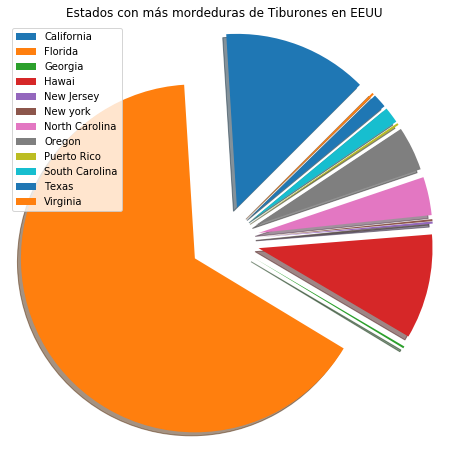

In [41]:
fig = plt.figure(figsize=(8,8))
fig.tight_layout()
ax1 =fig.add_subplot(1,1,1)

accidentes=[72, 349, 1, 52, 1, 1, 19, 22, 1, 8, 7, 1]

explode=[0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie( accidentes, explode= explode, shadow=True, startangle=45)

plt.legend(Area)
plt.title("Estados con más mordeduras de Tiburones en EEUU")

plt.show()



Conclusión: La mayor cantidad de mordeduras de tiburones se presenta en la costa este de los EEUU, formados por los estados de Florida, Georgia, North y South Carolina, Virginia y New Jersey.

    